Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

Đã lưu ảnh tại: fruit_composite.png


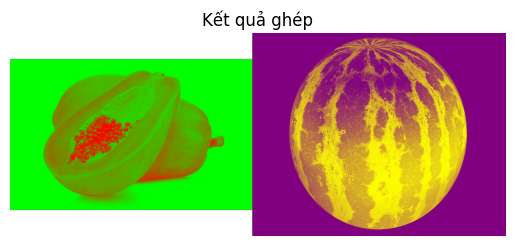

In [1]:
# 1. Thư viện cần thiết
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# 2. Hàm áp dụng gradient màu
def apply_gradient(img, color_start, color_end):
    img = img.convert('RGBA')
    np_img = np.array(img)
    alpha = np_img[:, :, 3] / 255.0
    gray = cv2.cvtColor(np_img[:, :, :3], cv2.COLOR_RGB2GRAY) / 255.0

    # Tạo gradient màu giữa 2 màu
    gradient = np.zeros_like(np_img[:, :, :3], dtype=np.uint8)
    for i in range(3):
        gradient[:, :, i] = (color_start[i] + (color_end[i] - color_start[i]) * gray).astype(np.uint8)

    # Gắn alpha trở lại
    gradient_img = np.dstack((gradient, (alpha * 255).astype(np.uint8)))
    return Image.fromarray(gradient_img)

# 3. Đường dẫn ảnh
img_papaya = Image.open("exercise/papaya.jpg").convert("RGBA")
img_watermelon = Image.open("exercise/watermelon.jpg").convert("RGBA")

# 4. Áp dụng gradient
# Đu đủ: đỏ → xanh lá
colored_papaya = apply_gradient(img_papaya, color_start=(255, 0, 0), color_end=(0, 255, 0))

# Dưa hấu: vàng → tím
colored_watermelon = apply_gradient(img_watermelon, color_start=(255, 255, 0), color_end=(128, 0, 128))

# 5. Tạo nền trong suốt
canvas_w = colored_papaya.width + colored_watermelon.width
canvas_h = max(colored_papaya.height, colored_watermelon.height)
transparent_bg = Image.new("RGBA", (canvas_w, canvas_h), (0, 0, 0, 0))

# 6. Ghép ảnh
transparent_bg.paste(colored_papaya, (0, (canvas_h - colored_papaya.height)//2), colored_papaya)
transparent_bg.paste(colored_watermelon, (colored_papaya.width, (canvas_h - colored_watermelon.height)//2), colored_watermelon)

# 7. Lưu kết quả
output_path = "fruit_composite.png"
transparent_bg.save(output_path, format="PNG")
print(f"Đã lưu ảnh tại: {output_path}")

# 8. Hiển thị ảnh kết quả
plt.imshow(transparent_bg)
plt.axis('off')
plt.title("Kết quả ghép")
plt.show()
